In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('housing_price_dataset.csv')

In [3]:
dataset.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
numerical_features=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']
categorical_features=['Address']

In [5]:
dataset=dataset[numerical_features + categorical_features+['Price']]

In [6]:
dataset


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Address,Price
0,79545.458574,5.682861,7.009188,23086.800503,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,"188 Johnson Views Suite 079\nLake Kathleen, CA...",1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,USS Barnett\nFPO AP 44820,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,USNS Raymond\nFPO AE 09386,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,USNS Williams\nFPO AP 30153-7653,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,"PSC 9258, Box 8489\nAPO AA 42991-3352",1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,USS Wallace\nFPO AE 73316,1.198657e+06


In [7]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
categorical_encoded=encoder.fit_transform(dataset[categorical_features])
categorical_df=pd.DataFrame(categorical_encoded,columns=encoder.get_feature_names_out(categorical_features))
dataset=pd.concat([dataset[numerical_features] ,categorical_df,dataset['Price']],axis=1)

In [8]:
dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,"Address_000 Todd Pines\nAshleyberg, KY 90207-1179","Address_001 Steve Plaza\nJessicastad, UT 25190","Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718","Address_00149 Raymond Knolls\nNew Jason, UT 75026","Address_002 Katherine Flat\nHartmanland, AZ 37973-3049","Address_0022 Young Rest\nLake Kevin, CA 25438-1821",...,Address_Unit 9463 Box 0963\nDPO AE 49984-2796,Address_Unit 9494 Box 2307\nDPO AE 58622,Address_Unit 9664 Box 1605\nDPO AA 30902,Address_Unit 9732 Box 1846\nDPO AE 69898-3304,Address_Unit 9774 Box 4511\nDPO AE 44963,Address_Unit 9778 Box 2114\nDPO AP 59374,Address_Unit 9785 Box 0790\nDPO AP 60371-0797,Address_Unit 9831 Box 7128\nDPO AA 54705,Address_Unit 9871 Box 9037\nDPO AP 37275-9289,Price
0,79545.458574,5.682861,7.009188,23086.800503,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.309435e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.060194e+06
4996,78491.275435,6.999135,6.576763,25616.115489,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.482618e+06
4997,63390.686886,7.250591,4.805081,33266.145490,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.030730e+06
4998,68001.331235,5.534388,7.130144,42625.620156,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.198657e+06


In [9]:
x = dataset.iloc[:, 0 :-1]
y = dataset.iloc[:, -1]
print(x)
print(y)


      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Area Population  Address_000 Todd Pines\nAshleyberg, KY 90207-1179  \
0        23086.800503              

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(x)
print(y)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Area Population  Address_000 Todd Pines\nAshleyberg, KY 90207-1179  \
0        23086.800503              

In [11]:
from sklearn.preprocessing import StandardScaler
numerical_data=dataset[numerical_features]
scaler = StandardScaler().fit(numerical_data)
normalized_numerical_data=scaler.transform(numerical_data)

In [14]:
from sklearn.linear_model import Lasso
ridgeReg = Lasso(alpha=10)
ridgeReg.fit(x_train,y_train)

Lasso(alpha=10)

In [15]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(x_train,y_train)

Ridge(alpha=10)

In [16]:
print("Coefficients:",ridgeReg.coef_," Constant:",ridgeReg.intercept_)

Coefficients: [ 2.16678423e+01  1.65366550e+05  1.21225787e+05 ...  1.32566439e+04
 -1.29171800e+04 -6.21007393e+02]  Constant: -2641740.989848052


In [17]:
y_pred = ridgeReg.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

            Actual     Predicted
398   8.942511e+05  9.702375e+05
3833  9.329794e+05  9.573632e+05
4836  9.207479e+05  9.070602e+05
4572  6.918549e+05  4.906890e+05
636   7.327332e+05  7.170194e+05
...            ...           ...
4228  7.549606e+05  8.412534e+05
2367  1.205568e+06  1.137875e+06
788   6.682555e+05  5.001840e+05
1452  1.398760e+06  1.233877e+06
3265  1.277381e+06  1.159007e+06

[1000 rows x 2 columns]


In [18]:
from sklearn import metrics 
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error:', metrics.mean_squared_error(y_test, y_pred))
      

Mean absolute error: 82553.34540604048
Mean squared error: 10540961946.038359


In [19]:
df.head()


,Actual,Predicted
398,894251.068636,970237.500287
3833,932979.360621,957363.165621
4836,920747.911288,907060.195051
4572,691854.921027,490688.965187
636,732733.236293,717019.391371


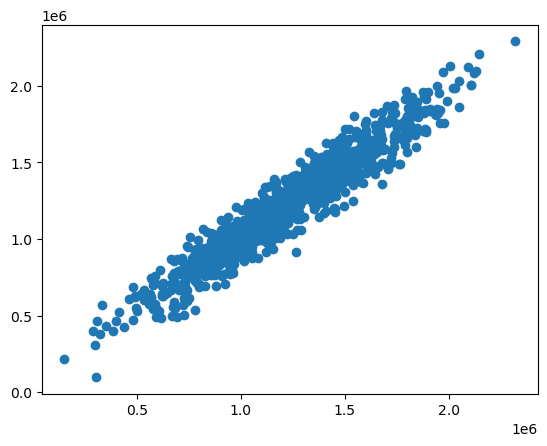

In [20]:
plt.scatter(y_test,y_pred)

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score
mae = mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("Mean Absolute error (MAE):",mae)
print("Mean Squared error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("R2 Score:",r2)

Mean Absolute error (MAE): 82553.34540604048
Mean Squared error (MSE): 10540961946.038359
Root Mean Squared Error (RMSE): 102669.18693570315
R2 Score: 0.9147163228736549
